**Project Commodities markets and models**

Majeure: Ingénieurie Financière

Gilles Delpy Sop Fofou 
 ||  Barthélémy Bengloan

## Stratégie d'investissement sur les matières premières par replication indicielle

##### Investissement basé sur la corrélation entre des matières issues de produits agricoles (cacao, sucre, coton, café) et l'indice du pétrole

On commence par importer les modules qui vont nous être utile

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Nous allons récupérer notre donnés sur Yahoo Finance

Nous voulons un dataset par indice  

In [8]:
# Dictionnaire des tickers et noms simplifiés associés
tickers = {'SB=F': 'sucre','CC=F': 'cacao','KC=F': 'cafe','CT=F': 'coton','CL=F': 'petrole'}
start_date = '2000-01-01'
end_date = '2025-01-01'

for ticker, nom in tickers.items():
    print(f"Téléchargement des données pour {ticker} ({nom})")
    df = yf.download(ticker, start=start_date, end=end_date)
    csv_name = f"{nom}_historical_data.csv"
    df.to_csv(csv_name)
    print(f" Data sauvegardées dans le fichier : {csv_name}\n")


Téléchargement des données pour SB=F (sucre)
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


 Data sauvegardées dans le fichier : sucre_historical_data.csv

Téléchargement des données pour CC=F (cacao)
 Data sauvegardées dans le fichier : cacao_historical_data.csv

Téléchargement des données pour KC=F (cafe)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 Data sauvegardées dans le fichier : cafe_historical_data.csv

Téléchargement des données pour CT=F (coton)



[*********************100%***********************]  1 of 1 completed

 Data sauvegardées dans le fichier : coton_historical_data.csv

Téléchargement des données pour CL=F (petrole)
 Data sauvegardées dans le fichier : petrole_historical_data.csv



#### Data Cleannig, Processing

Avant toutes choses, pour travailler correctement, il est nécessaire de travailler sur des datasets de qualités et propre

Apperçu du dataset pour le sucre

In [14]:
data_sucre = pd.read_csv("sucre_historical_data.csv", index_col=0)
data_sucre

,Close,High,Low,Open,Volume
Price,,,,,
Ticker,SB=F,SB=F,SB=F,SB=F,SB=F
Date,NaN,NaN,NaN,NaN,NaN
2000-03-01,5.079999923706055,5.139999866485596,4.980000019073486,4.980000019073486,10467
2000-03-02,4.960000038146973,5.130000114440918,4.940000057220459,5.079999923706055,9638
2000-03-03,5.050000190734863,5.059999942779541,4.960000038146973,4.960000038146973,5879
...,...,...,...,...,...
2024-12-24,19.540000915527344,19.81999969482422,19.5,19.600000381469727,0
2024-12-26,19.260000228881836,19.540000915527344,19.170000076293945,19.510000228881836,26005
2024-12-27,19.3700008392334,19.450000762939453,19.18000030517578,19.239999771118164,34311


On remarque que la ligne de l'index ne sert à rien et que la date est en index. Nous allons réarranger tout cela.

In [17]:
indexticker = data_sucre[data_sucre["Close"] == "SB=F"].index 
data_sucre.dropna(how='all', inplace=True)
data_sucre.drop(indexticker, inplace=True)
data_sucre.reset_index(inplace=True)

data_sucre.rename(columns={"Price": "Date"}, inplace=True)

data_sucre

,Date,Close,High,Low,Open,Volume
0,2000-03-01,5.079999923706055,5.139999866485596,4.980000019073486,4.980000019073486,10467
1,2000-03-02,4.960000038146973,5.130000114440918,4.940000057220459,5.079999923706055,9638
2,2000-03-03,5.050000190734863,5.059999942779541,4.960000038146973,4.960000038146973,5879
3,2000-03-06,5.039999961853027,5.159999847412109,5.03000020980835,5.099999904632568,11290
4,2000-03-07,5.070000171661377,5.139999866485596,5.03000020980835,5.050000190734863,9369
...,...,...,...,...,...,...
6224,2024-12-24,19.540000915527344,19.81999969482422,19.5,19.600000381469727,0
6225,2024-12-26,19.260000228881836,19.540000915527344,19.170000076293945,19.510000228881836,26005
6226,2024-12-27,19.3700008392334,19.450000762939453,19.18000030517578,19.239999771118164,34311
6227,2024-12-30,19.1299991607666,19.65999984741211,19.049999237060547,19.3700008392334,43046


Maintenant nous allons regarder le type des colonnes et changer si besoin

In [20]:
data_sucre.dtypes

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [22]:
# Conversion de la colonne 'Date' en datetime
data_sucre['Date'] = pd.to_datetime(data_sucre['Date'], errors='coerce')
colonnes_numeriques = data_sucre.columns.drop('Date')

# pour format numérique
for col in colonnes_numeriques:
    data_sucre[col] = pd.to_numeric(data_sucre[col], errors='coerce')

data_sucre.dtypes


Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

On regarde s'il y a de nombreuses valeurs manquantes

In [25]:
missing_values=data_sucre.isnull().sum()
print('\nMissing values by each columns:')
print(missing_values)


Missing values by each columns:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [27]:
data_sucre.dropna(inplace=True)
data_sucre

,Date,Close,High,Low,Open,Volume
0,2000-03-01,5.080000,5.140000,4.980000,4.980000,10467
1,2000-03-02,4.960000,5.130000,4.940000,5.080000,9638
2,2000-03-03,5.050000,5.060000,4.960000,4.960000,5879
3,2000-03-06,5.040000,5.160000,5.030000,5.100000,11290
4,2000-03-07,5.070000,5.140000,5.030000,5.050000,9369
...,...,...,...,...,...,...
6224,2024-12-24,19.540001,19.820000,19.500000,19.600000,0
6225,2024-12-26,19.260000,19.540001,19.170000,19.510000,26005
6226,2024-12-27,19.370001,19.450001,19.180000,19.240000,34311
6227,2024-12-30,19.129999,19.660000,19.049999,19.370001,43046


In [29]:
data_sucre.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

On enregistre maintenant ce nouveau dataset propre

In [32]:
data_sucre.to_csv("clean_data_sucre.csv", index=False)

sucre=pd.read_csv("clean_data_sucre.csv")
sucre

,Date,Close,High,Low,Open,Volume
0,2000-03-01,5.080000,5.140000,4.980000,4.980000,10467
1,2000-03-02,4.960000,5.130000,4.940000,5.080000,9638
2,2000-03-03,5.050000,5.060000,4.960000,4.960000,5879
3,2000-03-06,5.040000,5.160000,5.030000,5.100000,11290
4,2000-03-07,5.070000,5.140000,5.030000,5.050000,9369
...,...,...,...,...,...,...
6224,2024-12-24,19.540001,19.820000,19.500000,19.600000,0
6225,2024-12-26,19.260000,19.540001,19.170000,19.510000,26005
6226,2024-12-27,19.370001,19.450001,19.180000,19.240000,34311
6227,2024-12-30,19.129999,19.660000,19.049999,19.370001,43046


Désormais, nous disposons d'un dataset propre sur lequel nous pouvons travailler efficacement. Dans le notebook, nous avons illustré la démarche pour l’un des indices et, bien entendu, cette méthode a été appliquée aux autres indices.

Voici les autres datasets propre

In [36]:
petrole=pd.read_csv("clean_data_petrole.csv")
cacao=pd.read_csv("clean_data_cacao.csv")
cafe=pd.read_csv("clean_data_cafe.csv")
coton=pd.read_csv("clean_data_coton.csv")

##### Pour mieux visualiser à quoi ressemble nos variables nous allons tracer leurs evolutions au cours du temps 

Rq : on met en base 100 pour avoir un meilleur aperçu

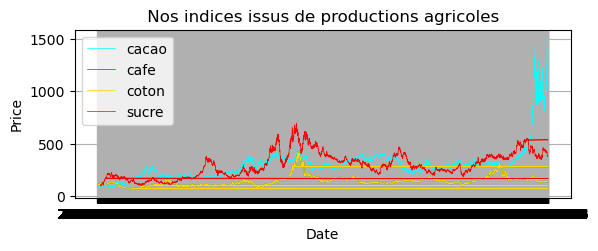

In [44]:
plt.subplot(2,1,1)
plt.title(" Nos indices issus de productions agricoles ")
plt.plot(cacao['Date'], 100*cacao['Close']/cacao['Close'][0], linewidth=0.5, label="cacao", color="cyan")
plt.plot(cafe['Date'], 100*cafe['Close']/cafe['Close'][0], linewidth=0.5, label="cafe", color="green")
plt.plot(coton['Date'], 100*coton['Close']/coton['Close'][0], linewidth=0.5, label="coton", color="gold")
plt.plot(sucre['Date'], 100*sucre['Close']/sucre['Close'][0], linewidth=0.5, label="sucre", color="red")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()


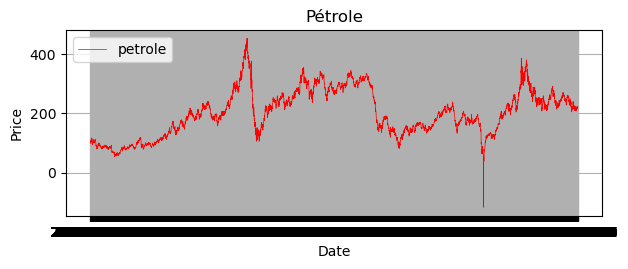

In [46]:
plt.subplot(2,1,2)
plt.title("Pétrole")
plt.plot(petrole['Date'], 100*petrole['Close']/petrole['Close'][0], linewidth=0.5, label="petrole", color="red")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

##### Regardons maintenat la corrélation de nos indices issus de productions agricoles avec le prix du pétrole 

In [49]:
data = {'coton': coton['Close'],'cacao': cacao['Close'],'cafe': cafe['Close'],'sucre': sucre['Close'],'petrole': petrole['Close'],}
df = pd.DataFrame(data)
correlation_matrix = df.corr()

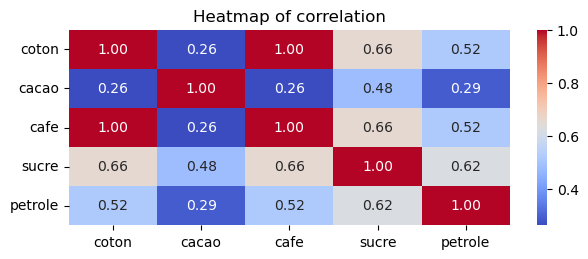

In [51]:
plt.subplot(2, 1, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of correlation')
plt.tight_layout()
plt.show()

On shift la time series pour voir si cela change de manière significative

In [54]:
shift = 20
data_shift = {'coton': coton['Close'].shift(shift),'cacao': cacao['Close'].shift(shift),'cafe': cafe['Close'].shift(shift),'sucre': sucre['Close'].shift(shift),'petrole': petrole['Close'],}
df_shift = pd.DataFrame(data_shift)
correlation_matrix_shifted = df_shift.corr()

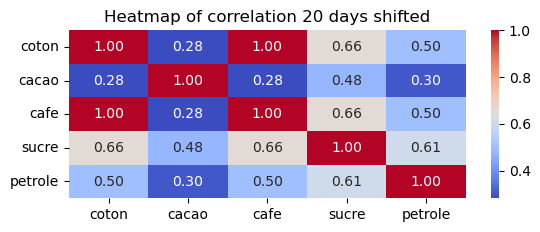

In [56]:
plt.subplot(2, 1, 1)
sns.heatmap(correlation_matrix_shifted, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Heatmap of correlation {shift} days shifted')
plt.show()

##### Nous allons définir notre indice pour pouvoir répliquer l'évolution du cours total de nos productions agricoles <br>
On a décidé d'équiper notre indice de réplication

In [59]:
agri_index = sucre['Close']/4 + cacao['Close']/4 + cafe['Close']/4 + coton['Close']/4
agri_index_df = pd.DataFrame({'Date': sucre['Date'], 'Close': agri_index})

In [61]:
agri_index_df.dropna(inplace=True)
agri_index_df.shape
agri_index_df


,Date,Close
0,2000-03-01,234.305000
1,2000-03-02,235.605000
2,2000-03-03,234.792501
3,2000-03-06,237.550001
4,2000-03-07,241.497500
...,...,...
6224,2024-12-24,1856.914999
6225,2024-12-26,1887.524999
6226,2024-12-27,1873.127500
6227,2024-12-30,1875.117499


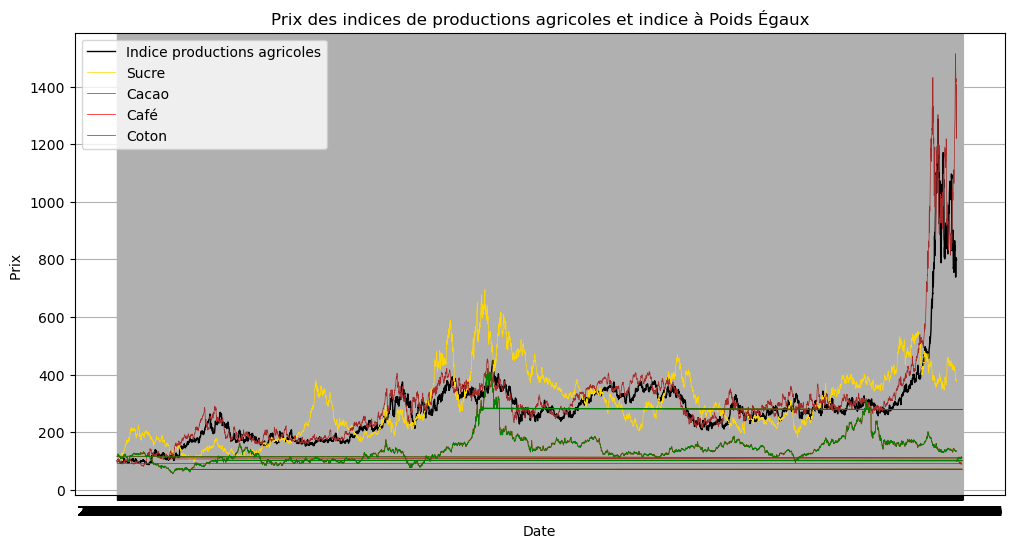

In [63]:
plt.figure(figsize=(12, 6))
plt.title("Prix des indices de productions agricoles et indice à Poids Égaux")
plt.plot(agri_index_df['Date'], 100 * agri_index_df['Close'] / agri_index_df['Close'][0], linewidth=1, color="black", label="Indice productions agricoles")
plt.plot(sucre['Date'], 100 * sucre['Close'] / sucre['Close'][0], linewidth=0.5, color="gold", label="Sucre")
plt.plot(cacao['Date'], 100 * cacao['Close'] / cacao['Close'][0], linewidth=0.5, color="brown", label="Cacao")
plt.plot(cafe['Date'], 100 * cafe['Close'] / cafe['Close'][0], linewidth=0.5, color="red", label="Café")
plt.plot(coton['Date'], 100 * coton['Close'] / coton['Close'][0], linewidth=0.5, color="green", label="Coton")
plt.xlabel('Date')
plt.ylabel('Prix ')
plt.legend()
plt.grid()
plt.show()

On peut visualiser l'indice par rapport au pétrole

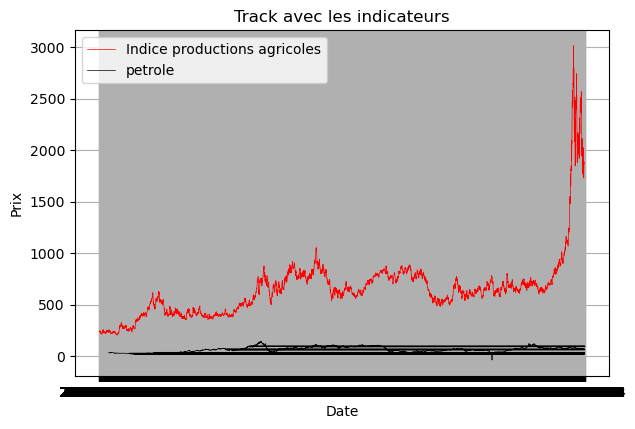

In [66]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)

plt.plot(agri_index_df['Date'], agri_index_df['Close'], linewidth=0.5, label="Indice productions agricoles", color="red")
plt.plot(petrole['Date'], petrole['Close'], linewidth=0.5, label="petrole", color="black")
plt.title("Track avec les indicateurs")
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

##### La stratégie

Nous allons avec notre portefeuille et etablir une stratégie et voir c'est performance pour diffrent niveau de risque

On convertit en datetime car lorsqu'on lit les date sont de types object 

In [79]:
petrole['Date'] = pd.to_datetime(petrole['Date'])

In [81]:
agri_index_df['Date'] = pd.to_datetime(agri_index_df['Date'])

In [83]:
portefeuille, mise_de_base  = [0], 1
date, shift, share, timespan = petrole['Date'][0], 20, mise_de_base/4, 1
alarm, exposure, fees, risk = 0.1, 20000, 0.01, 0.05
date_buy, date_sell, date_order = [], [], [petrole['Date'][0]]
'''
    Variables:
        Alarm: Variation in the barrel price triggering the purchase of the index.
        Exposure: Time the investor agreed on being invested in the index.
        Fees: Fees of the broker.
        Risk: Desired yield, as long as it is not achieved, the index is retained.
'''

found_end = False
while not found_end:
    while (date not in petrole['Date'].values) or ((date + datetime.timedelta(days=shift)) not in petrole['Date'].values):
        date += datetime.timedelta(days=1)
    
    #ordre d'achat     
    while ((petrole.loc[petrole['Date'] == date + datetime.timedelta(days=shift), 'Close'].values[0] / petrole.loc[petrole['Date'] == date, 'Close'].values[0]) - 1 < alarm):
        date += datetime.timedelta(days=1)
        
        if date + datetime.timedelta(days=shift) >= petrole['Date'].iloc[-1]:
            found_end = True
            break
        
        if found_end:
                break
            
        while date not in petrole['Date'].values or date + datetime.timedelta(days=shift) not in petrole['Date'].values:
            date += datetime.timedelta(days=1)

    date += datetime.timedelta(days=shift)  
    buy_value = agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]
    date_buy.append(date)
    print(date)
    print("Acheter à ", buy_value)
    
    while (date not in agri_index_df['Date'].values) or ((date + datetime.timedelta(days=shift)) not in agri_index_df['Date'].values):
        date += datetime.timedelta(days=1)
        if date + datetime.timedelta(days=shift) >= agri_index_df['Date'].iloc[-1]:
            date = agri_index_df['Date'].iloc[-1]
            sell_value = agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]
            portefeuille.append((sell_value - buy_value) * (1 - fees) + portefeuille[-1])
            found_end = True
            break
        if found_end:
                break
            
    elapse_time = 0
    
    
    #ordre de vente
    if date + datetime.timedelta(days=shift) >= agri_index_df['Date'].iloc[-1]:
        date = agri_index_df['Date'].iloc[-1]
        sell_value = agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]
        found_end = True
        date_sell.append(date)
        date_order.append(date)
        break

    while ((agri_index_df.loc[agri_index_df['Date'] == date + datetime.timedelta(days=shift), 'Close'].values[0] / agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]) - 1 < risk):
        date += datetime.timedelta(days=1)
        elapse_time += 1

        if date + datetime.timedelta(days=shift) >= agri_index_df['Date'].iloc[-1]:
            date = agri_index_df['Date'].iloc[-1]
            sell_value = agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]
            found_end = True
            break
        if found_end:
                break
            
        if elapse_time > exposure:
            sell_value = agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]
            break
        if found_end:
                break
        
        while date not in agri_index_df['Date'].values or date + datetime.timedelta(days=shift) not in agri_index_df['Date'].values:
            date += datetime.timedelta(days=1)
            if date + datetime.timedelta(days=shift) >= agri_index_df['Date'].iloc[-1]:
                date = agri_index_df['Date'].iloc[-1]
                sell_value = agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]
                found_end = True
                break
            if found_end:
                    break
            
    date += datetime.timedelta(days=shift)

    if not found_end:
        date_sell.append(date)
        sell_value = agri_index_df.loc[agri_index_df['Date'] == date, 'Close'].values[0]
        date_order.append(agri_index_df.loc[agri_index_df['Date'] == date, 'Date'].values[0])
        # Mise à jour du portefeuille
    print(date)
    print("Vendu à ", sell_value)
    print("P&L", sell_value-buy_value)
    portefeuille.append((sell_value - buy_value) * (1 - fees) + portefeuille[-1])
    if found_end:
        date_sell.append(date)
        date_order.append(agri_index_df.loc[agri_index_df['Date'] == agri_index_df['Date'].iloc[-1], 'Date'].values[0])

print("Valeur du portefeuille", portefeuille[-1])

2000-09-18 00:00:00
Acheter à  242.84749937057495
2000-11-07 00:00:00
Vendu à  233.11750054359436
P&L -9.72999882698059
2001-01-10 00:00:00
Acheter à  217.7725007534027
2001-02-13 00:00:00
Vendu à  218.39000129699707
P&L 0.6175005435943604
2001-08-07 00:00:00
Acheter à  249.6849991083145
2001-08-27 00:00:00
Vendu à  266.16250014305115
P&L 16.477501034736633
2001-12-05 00:00:00
Acheter à  290.2724997997284
2002-01-16 00:00:00
Vendu à  308.9349993467331
P&L 18.6624995470047
2002-02-11 00:00:00
Acheter à  337.3050003051758
2002-03-05 00:00:00
Vendu à  366.79000067710876
P&L 29.485000371932983
2002-04-01 00:00:00
Acheter à  356.16750037670135
2002-04-22 00:00:00
Vendu à  379.3224992752075
P&L 23.154998898506165
2002-05-14 00:00:00
Acheter à  406.602499127388
2002-06-13 00:00:00
Vendu à  414.24999928474426
P&L 7.647500157356262
2002-08-20 00:00:00
Acheter à  422.69249975681305
2002-09-09 00:00:00
Vendu à  458.4100008010864
P&L 35.71750104427338
2002-12-16 00:00:00
Acheter à  551.85000038146

SUPER! <br> 
Maintenant on va calcul le rationnel des investisseurs

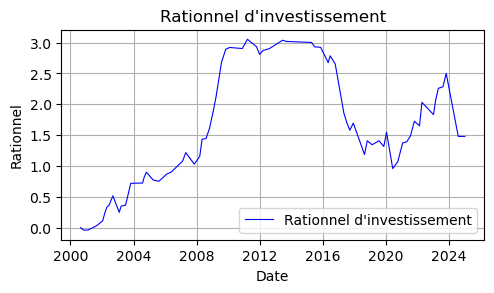

In [86]:
ratio_investissement = np.array(portefeuille) / agri_index_df['Close'][0]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.plot(date_order, ratio_investissement, linewidth=0.8, label="Rationnel d'investissement", color="blue")
plt.title("Rationnel d'investissement")
plt.xlabel('Date')
plt.ylabel('Rationnel')
plt.grid()
plt.legend()

Pour mieux visualiser l'evolution de notre portefeuille au cours du temps on va tracer cette évolution par rapport au cours de notre indice et celui du pétrole

1) Par rapport au cours de notre indice

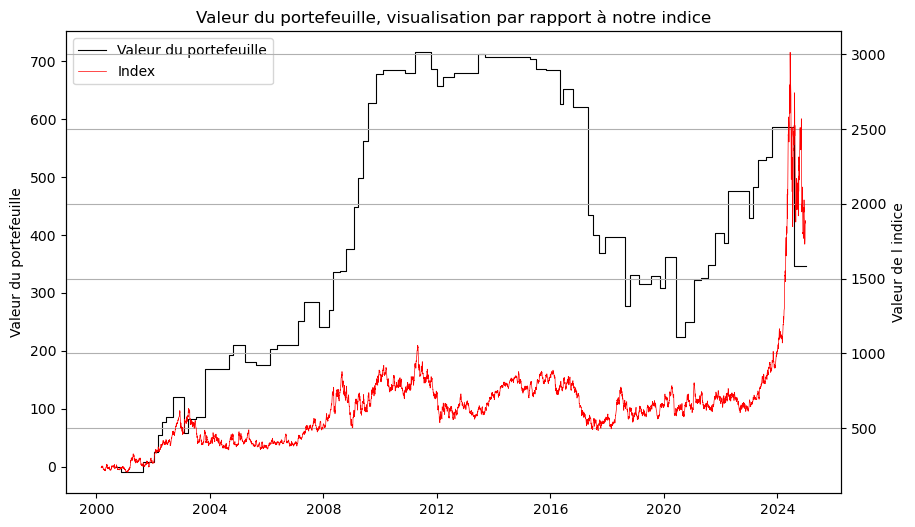

In [90]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Valeur du portefeuille, visualisation par rapport à notre indice')
ax1.step(date_order, portefeuille, linewidth=0.8, label="Valeur du portefeuille", color="black", where='post')
ax1.set_ylabel('Valeur du portefeuille')

ax2 = ax1.twinx()
ax2.plot(agri_index_df['Date'], agri_index_df['Close'], color='red', label='Index', linewidth=0.5)
ax2.set_ylabel('Valeur de l indice')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid()
plt.show()

2) Par raport au cours du pétrole 

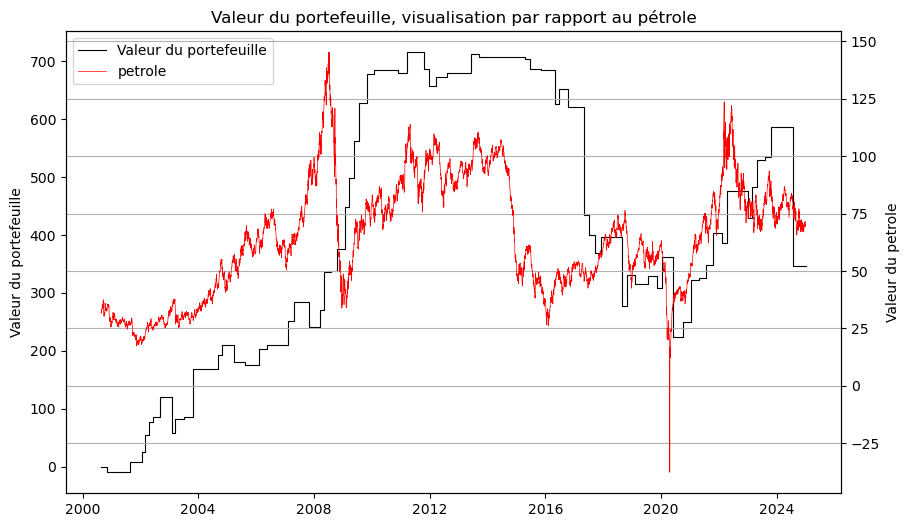

In [93]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Valeur du portefeuille, visualisation par rapport au pétrole')
ax1.step(date_order, portefeuille, linewidth=0.8, label="Valeur du portefeuille", color="black", where='post')
ax1.set_ylabel('Valeur du portefeuille')

ax2 = ax1.twinx()
ax2.plot(petrole['Date'], petrole['Close'], color='red', label='petrole', linewidth=0.5)
ax2.set_ylabel('Valeur du petrole')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid()
plt.show()

Merci pour ce projet